In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

<ipython-input-2-f70465ae7e46>:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))


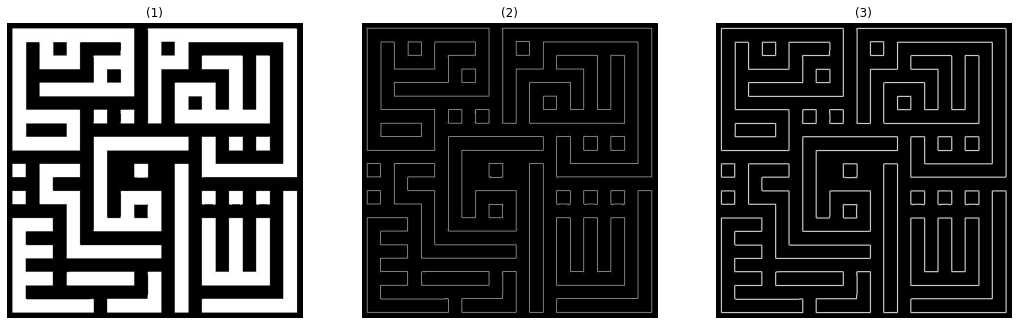

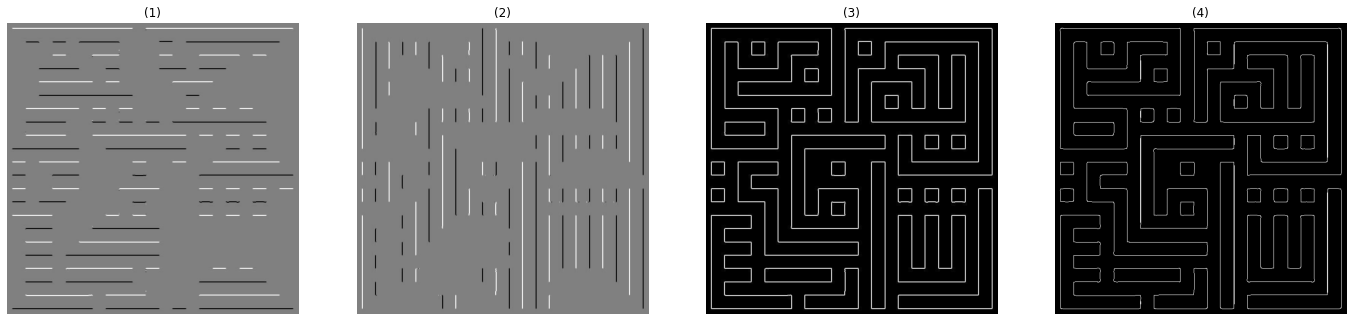

In [2]:
# 1. Built-in Sobel, Prewill, Roberts

img = rgb2gray(io.imread('ACdata_base/9/1496.jpg'))
img_roberts = roberts(img)
img_perwitt = prewitt(img)
img_sobel_h = sobel_h(img)
img_sobel_v = sobel_v(img)
img_sobel = sobel(img)
img_canny = canny(img)
show_images([img,img_roberts,img_perwitt])
show_images([img_sobel_h,img_sobel_v,img_sobel,img_canny])

In [3]:
!pip install opencv-python

In [4]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread('ACdata_base/9/1496.jpg')
h = hog.compute(im)
print(hog)

<HOGDescriptor 000002CB418FE790>


In [3]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm

img = cv2.imread('ACdata_base/9/1496.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
#print(lines)

HV = 0;
Total = 0
for line in lines:
    if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
        HV+=1;
    Total +=1

HVSL = Total - HV

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
def HVSL(gray):    
    edges = cv2.Canny(gray,50,150,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/180,200)
    print(lines)
    if (lines is None): 
        return -1 
    HV = 0;
    Total = 0
    for line in lines:
        if(line[0,1] == 0 or abs(line[0,1] - np.pi/2) < 0.001 ):
            HV+=1;
        Total +=1

    return Total - HV

In [7]:
print(img.shape)
HVSL(img)

(599, 600, 3)
[[[588.          0.       ]]

 [[ 11.          1.5707964]]

 [[587.          1.5707964]]

 [[ 11.          0.       ]]

 [[559.          0.       ]]

 [[367.          0.       ]]

 [[339.          0.       ]]

 [[203.          1.5707964]]

 [[ 38.          1.5707964]]

 [[230.          1.5707964]]

 [[259.          1.5707964]]

 [[532.          0.       ]]

 [[532.          1.5707964]]

 [[395.          0.       ]]

 [[312.          0.       ]]

 [[175.          0.       ]]

 [[286.          1.5707964]]

 [[285.          0.       ]]

 [[477.          0.       ]]

 [[312.          1.5707964]]

 [[148.          0.       ]]

 [[504.          0.       ]]

 [[505.          1.5707964]]

 [[478.          1.5707964]]

 [[450.          0.       ]]

 [[559.          1.5707964]]

 [[423.          0.       ]]

 [[258.          0.       ]]

 [[175.          1.5707964]]

 [[340.          1.5707964]]

 [[148.          1.5707964]]

 [[451.          1.5707964]]

 [[203.          0.       

0

In [8]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 9

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('ACdata_base',
                                    target_size=(599, 600),
                                    batch_size=73139,
                                    class_mode='sparse',
                                   color_mode='grayscale',
                                    shuffle=True )
X , y = data.next()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11);
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=11);
X_train.shape

Found 1685 images belonging to 9 classes.


(1348, 599, 600, 1)

In [10]:
#X_train_gray = rgb2gray(X_train)
print(X_train.shape)

(1348, 599, 600, 1)


In [11]:

values = []
for gray in X_train:
    print(gray.shape)
    values.append(HVSL(np.uint8(gray)))
    
    

(599, 600, 1)
[[[519.          0.       ]]

 [[522.          0.       ]]

 [[348.          1.5707964]]

 [[381.          0.       ]]]
(599, 600, 1)
[[[-291.          3.106686]]]
(599, 600, 1)
[[[386.          1.5707964]]

 [[216.          0.       ]]

 [[299.          0.       ]]

 [[546.          0.       ]]

 [[527.          0.       ]]

 [[538.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[288.          1.5707964]]

 [[588.          1.5707964]]

 [[587.          0.       ]]

 [[ 11.          0.       ]]

 [[ 11.          1.5707964]]

 [[312.          1.5707964]]

 [[197.          0.       ]]

 [[329.          1.5707964]]

 [[ 28.          1.5707964]]

 [[263.          0.       ]]

 [[563.          0.       ]]

 [[539.          0.       ]]

 [[125.          0.       ]]

 [[104.          0.       ]]

 [[ 48.          1.5707964]]

 [[402.          1.5707964]]

 [[103.          1.5707964]]

 [[356.          0.       ]]

 [[380.          0.       ]]

 [[234.          1.570796

 [[330.          1.5707964]]]
(599, 600, 1)
[[[225.          0.       ]]

 [[360.          0.       ]]

 [[356.          0.       ]]

 [[505.          0.       ]]

 [[228.          0.       ]]

 [[387.          0.       ]]

 [[508.          0.       ]]

 [[414.          0.       ]]

 [[376.          1.5707964]]

 [[417.          0.       ]]

 [[  9.          0.       ]]

 [[174.          0.       ]]

 [[358.          1.5707964]]

 [[383.          0.       ]]

 [[ 12.          0.       ]]

 [[410.          0.       ]]

 [[124.          0.       ]]

 [[390.          0.       ]]

 [[171.          0.       ]]

 [[211.          0.       ]]

 [[384.          1.5707964]]

 [[221.          0.       ]]

 [[393.          1.5707964]]

 [[120.          0.       ]]

 [[367.          1.5707964]]

 [[178.          0.       ]]

 [[341.          1.5707964]]

 [[114.          0.       ]]

 [[511.          0.       ]]

 [[333.          1.5707964]]

 [[350.          1.5707964]]

 [[437.          0.       

None
(599, 600, 1)
None
(599, 600, 1)
[[[329.          0.       ]]

 [[374.          0.       ]]

 [[286.          0.       ]]

 [[308.          0.       ]]

 [[351.          0.       ]]

 [[594.          0.       ]]

 [[132.          0.       ]]

 [[154.          0.       ]]

 [[198.          0.       ]]

 [[220.          0.       ]]

 [[395.          0.       ]]

 [[264.          0.       ]]

 [[176.          0.       ]]

 [[110.          0.       ]]

 [[585.          1.5707964]]

 [[242.          0.       ]]]
(599, 600, 1)
[[[150.   0.]]]
(599, 600, 1)
[[[568.          0.       ]]

 [[337.          1.5707964]]]
(599, 600, 1)
[[[363.          0.       ]]

 [[128.          0.       ]]

 [[137.          0.       ]]

 [[336.          1.5707964]]

 [[392.          1.5707964]]

 [[439.          0.       ]]

 [[423.          0.       ]]

 [[370.          0.       ]]

 [[131.          0.       ]]

 [[429.          0.       ]]

 [[301.          0.       ]]

 [[288.          0.       ]]

 [[2

[[[581.          0.       ]]

 [[584.          0.       ]]

 [[345.          0.       ]]

 [[403.          0.       ]]

 [[348.          0.       ]]

 [[400.          0.       ]]

 [[314.          0.       ]]

 [[535.          1.5707964]]

 [[308.          0.       ]]

 [[311.          0.       ]]

 [[528.          1.5707964]]

 [[305.          0.       ]]

 [[542.          1.5707964]]

 [[397.          0.       ]]

 [[578.          0.       ]]

 [[167.          0.       ]]

 [[587.          0.       ]]

 [[351.          0.       ]]

 [[458.          0.       ]]

 [[482.          0.7853982]]

 [[484.          0.7853982]]

 [[513.          1.5707964]]

 [[342.          0.       ]]

 [[436.          1.5707964]]

 [[449.          0.       ]]

 [[492.          0.       ]]

 [[376.          0.       ]]

 [[406.          0.       ]]

 [[575.          0.       ]]

 [[422.          1.5707964]]

 [[520.          1.5707964]]

 [[452.          0.       ]]

 [[112.          0.       ]]

 [[443.   

[[[363.          1.5707964]]

 [[358.          1.5707964]]

 [[343.          0.       ]]

 [[124.          0.       ]]

 [[443.          0.       ]]

 [[116.          0.       ]]

 [[564.          0.       ]]

 [[582.          0.       ]]

 [[574.          0.       ]]

 [[351.          0.       ]]

 [[572.          0.       ]]

 [[435.          0.       ]]

 [[324.          0.       ]]]
(599, 600, 1)
[[[212.          0.       ]]

 [[388.          0.       ]]

 [[414.          1.5707964]]

 [[390.          0.       ]]

 [[206.          0.       ]]

 [[208.          0.       ]]

 [[437.          1.5707964]]

 [[419.          1.5707964]]

 [[403.          1.5707964]]

 [[408.          1.5707964]]

 [[431.          1.5707964]]

 [[426.          1.5707964]]]
(599, 600, 1)
[[[406.          1.5707964]]]
(599, 600, 1)
[[[341.          1.5707964]]]
(599, 600, 1)
[[[346.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[122.          0.       ]]

 [[379.          0.       ]]

 [[ 40.    

None
(599, 600, 1)
None
(599, 600, 1)
[[[375.          1.5707964]]

 [[351.          1.5707964]]

 [[363.          1.5707964]]

 [[292.          0.       ]]

 [[297.          0.       ]]

 [[287.          0.       ]]

 [[555.          0.       ]]

 [[545.          0.       ]]

 [[ 48.          0.       ]]

 [[550.          0.       ]]

 [[389.          0.       ]]

 [[526.          0.       ]]

 [[316.          1.5707964]]

 [[560.          0.       ]]

 [[516.          0.       ]]

 [[262.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[-413.           3.1241393]]

 [[-285.           3.1241393]]

 [[ 288.           0.       ]]

 [[-167.           3.1241393]]

 [[ 416.           0.       ]]

 [[ 442.           0.       ]]

 [[ 506.           0.       ]]

 [[ 535.           0.       ]]

 [[ 198.           0.       ]]

 [[ 524.           0.       ]]

 [[-170.           3.1241393]]

 [[-410.           3.1241393]]

 [[ 299.           0.       ]]]
(599, 600, 1)
[[[552.   0.]]]
(59

[[[391.          1.5707964]]

 [[384.          1.5707964]]

 [[354.          1.5707964]]

 [[570.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[298.          0.       ]]

 [[527.          0.       ]]

 [[305.          0.       ]]

 [[519.          0.       ]]

 [[369.          0.       ]]

 [[507.          0.       ]]

 [[540.          0.       ]]

 [[317.          0.       ]]

 [[286.          0.       ]]

 [[454.          1.5707964]]

 [[458.          1.5707964]]

 [[413.          1.5707964]]]
(599, 600, 1)
[[[396.          1.5707964]]

 [[387.          1.5707964]]

 [[353.          1.5707964]]

 [[160.          0.       ]]

 [[303.          0.       ]]

 [[180.          0.       ]]]
(599, 600, 1)
[[[126.          0.       ]]

 [[ 60.          0.       ]]

 [[121.          0.       ]]

 [[ 64.          0.       ]]

 [[571.          1.5707964]]

 [[101.          0.       ]]

 [[ 37.          1.5707964]]

 [[ 97.          0.       ]]

 [[ 92.          1.5707964]]

 [[158.  

[[[573.          0.       ]]

 [[570.          0.       ]]

 [[452.          0.       ]]

 [[449.          0.       ]]

 [[583.          0.       ]]

 [[462.          0.       ]]

 [[348.          1.5707964]]

 [[373.          1.5707964]]

 [[459.          0.       ]]

 [[365.          1.5707964]]

 [[580.          0.       ]]

 [[357.          1.5707964]]

 [[175.          0.       ]]

 [[168.          0.       ]]

 [[340.          1.5707964]]

 [[165.          0.       ]]

 [[309.          0.       ]]

 [[455.          0.       ]]

 [[332.          1.5707964]]

 [[ 56.          0.       ]]

 [[210.          0.       ]]

 [[ 60.          0.       ]]

 [[315.          0.       ]]

 [[ 53.          0.       ]]

 [[171.          0.       ]]]
(599, 600, 1)
[[[ 97.   0.]]

 [[574.   0.]]

 [[ 94.   0.]]

 [[ 73.   0.]]

 [[266.   0.]]

 [[398.   0.]]

 [[256.   0.]]

 [[302.   0.]]

 [[215.   0.]]]
(599, 600, 1)
[[[3.        1.5707964]]]
(599, 600, 1)
[[[358.          1.5707964]]

 [[353. 

[[[-145.           3.1241393]]

 [[-437.           3.1241393]]

 [[-150.           3.1241393]]

 [[ 249.           0.       ]]]
(599, 600, 1)
[[[199.          0.       ]]

 [[317.          0.       ]]

 [[ 99.          0.       ]]

 [[334.          0.       ]]

 [[105.          0.       ]]

 [[195.          0.       ]]

 [[384.          1.5707964]]

 [[342.          0.       ]]

 [[328.          0.       ]]

 [[209.          0.       ]]

 [[309.          0.       ]]

 [[185.          0.       ]]

 [[193.          0.       ]]

 [[115.          0.       ]]

 [[ 87.          0.       ]]

 [[301.          0.       ]]

 [[ 89.          0.       ]]

 [[113.          0.       ]]

 [[354.          1.5707964]]]
(599, 600, 1)
[[[236.   0.]]

 [[476.   0.]]

 [[473.   0.]]

 [[233.   0.]]

 [[227.   0.]]

 [[482.   0.]]

 [[485.   0.]]

 [[239.   0.]]

 [[230.   0.]]

 [[517.   0.]]

 [[368.   0.]]

 [[508.   0.]]

 [[224.   0.]]]
(599, 600, 1)
[[[239.   0.]]

 [[233.   0.]]]
(599, 600, 1)
None
(

[[[386.          1.5707964]]

 [[395.          1.5707964]]

 [[404.          1.5707964]]

 [[377.          1.5707964]]

 [[ 89.          0.       ]]

 [[368.          1.5707964]]

 [[414.          1.5707964]]

 [[ 97.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 16.   0.]]

 [[175.   0.]]

 [[393.   0.]]]
(599, 600, 1)
[[[250.   0.]]]
(599, 600, 1)
None
(599, 600, 1)
[[[374.          1.5707964]]

 [[381.          1.5707964]]

 [[403.          1.5707964]]

 [[562.          0.       ]]

 [[566.          0.       ]]

 [[123.          0.       ]]]
(599, 600, 1)
[[[262.          0.       ]]

 [[431.          0.       ]]

 [[107.          0.       ]]

 [[194.          0.       ]]

 [[417.          0.       ]]

 [[ 71.          0.       ]]

 [[382.          0.       ]]

 [[421.          0.       ]]

 [[112.          0.       ]]

 [[456.          1.5707964]]

 [[436.          0.       ]]

 [[267.          0.       ]]

 [[529.          0.       ]]

 [[200.          0.       ]]

 [

[[[398.   0.]]]
(599, 600, 1)
[[[416.          1.5707964]]

 [[380.          1.5707964]]

 [[371.          1.5707964]]

 [[389.          1.5707964]]

 [[407.          1.5707964]]

 [[398.          1.5707964]]

 [[170.          0.       ]]

 [[298.          0.       ]]

 [[252.          0.       ]]

 [[372.          0.       ]]

 [[435.          1.5707964]]

 [[462.          1.5707964]]

 [[480.          1.5707964]]

 [[444.          1.5707964]]

 [[ 22.          0.       ]]

 [[489.          1.5707964]]

 [[ 30.          0.       ]]

 [[ 33.          0.       ]]

 [[369.          0.       ]]

 [[ 79.          0.       ]]

 [[353.          1.5707964]]

 [[471.          1.5707964]]

 [[164.          0.       ]]

 [[511.          0.       ]]

 [[362.          1.5707964]]

 [[ 19.          0.       ]]

 [[ 25.          0.       ]]

 [[187.          0.       ]]

 [[571.          0.       ]]

 [[426.          1.5707964]]

 [[184.          0.       ]]

 [[278.          0.       ]]

 [[470.   

 [[282.          1.5707964]]]
(599, 600, 1)
[[[394.          0.       ]]

 [[170.          0.       ]]

 [[173.          0.       ]]

 [[449.          0.       ]]

 [[365.          0.       ]]

 [[336.          0.       ]]

 [[452.          0.       ]]

 [[457.          0.       ]]

 [[136.          0.       ]]

 [[391.          0.       ]]

 [[328.          0.       ]]

 [[424.          1.5707964]]

 [[207.          0.       ]]

 [[202.          0.       ]]

 [[446.          1.5707964]]

 [[331.          0.       ]]

 [[416.          1.5707964]]

 [[360.          0.       ]]

 [[578.          0.       ]]

 [[355.          1.5707964]]

 [[454.          1.5707964]]

 [[507.          0.       ]]

 [[586.          0.       ]]

 [[228.          0.       ]]

 [[133.          0.       ]]

 [[333.          0.       ]]

 [[399.          0.       ]]

 [[515.          0.       ]]

 [[370.          0.       ]]

 [[408.          1.5707964]]

 [[431.          1.5707964]]]
(599, 600, 1)
[[[191.   0.

[[[357.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[411.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[-480.           3.1241393]]]
(599, 600, 1)
[[[581.          0.       ]]

 [[ 13.          0.       ]]

 [[ 29.          1.5707964]]

 [[ 63.          0.       ]]

 [[562.          1.5707964]]

 [[103.          0.       ]]

 [[ 95.          1.5707964]]

 [[146.          1.5707964]]

 [[212.          1.5707964]]

 [[535.          0.       ]]

 [[263.          1.5707964]]

 [[380.          1.5707964]]

 [[446.          1.5707964]]

 [[329.          1.5707964]]

 [[496.          1.5707964]]

 [[495.          0.       ]]

 [[449.          0.       ]]

 [[149.          0.       ]]]
(599, 600, 1)
[[[466.          0.       ]]

 [[387.          1.5707964]]

 [[398.          1.5707964]]

 [[469.          0.       ]]

 [[354.          1.5707964]]

 [[343.          1.5707964]]

 [[376.          1.5707964]]

 [[365.

None
(599, 600, 1)
[[[1.640000e+02 6.981317e-02]]

 [[5.480000e+02 8.726646e-02]]

 [[1.620000e+02 6.981317e-02]]]
(599, 600, 1)
[[[483.   0.]]

 [[578.   0.]]

 [[587.   0.]]

 [[575.   0.]]

 [[590.   0.]]

 [[480.   0.]]

 [[486.   0.]]]
(599, 600, 1)
[[[428.          1.5707964]]

 [[420.          1.5707964]]

 [[ 39.          0.       ]]

 [[388.          1.5707964]]

 [[ 35.          0.       ]]

 [[379.          1.5707964]]

 [[ 57.          0.       ]]

 [[ 54.          0.       ]]

 [[412.          1.5707964]]

 [[339.          1.5707964]]

 [[315.          1.5707964]]

 [[323.          1.5707964]]

 [[331.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 5.9600000e+02  0.0000000e+00]]

 [[ 6.5000000e+01  0.0000000e+00]]

 [[ 2.3100000e+02  0.0000000e+00]]

 [[ 2.7400000e+02  0.0000000e+00]]

 [[ 2.7900000e+02  0.0000000e+00]]

 [[ 1.2000000e+02  0.0000000e+00]]

 [[ 4.5300000e+02  0.0000000e+00]]

 [[ 5.2000000e+01  0.0000000e+00]]

 [[ 2.4100000e+02  0.0000000e+00]]

None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[529.   0.]]]
(599, 600, 1)
None
(599, 600, 1)
[[[360.          1.5707964]]

 [[353.          1.5707964]]

 [[392.          0.       ]]

 [[438.          0.       ]]

 [[379.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[352.          1.5707964]]

 [[345.          1.5707964]]

 [[322.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[271.          1.5707964]]

 [[326.          1.5707964]]

 [[108.          0.       ]]

 [[492.          1.5707964]]

 [[105.          1.5707964]]

 [[492.          0.       ]]

 [[327.          0.       ]]

 [[271.          0.       ]]

 [[217.          1.5707964]]]
(599, 600, 1)
[[[315.          1.5707964]]]
(599, 600, 1)
[[[440.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[321.          1.5707964]]

 [[315.          1.5707964]]

 [[353.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1

[[[408.   0.]]

 [[ 32.   0.]]

 [[405.   0.]]

 [[ 35.   0.]]

 [[402.   0.]]

 [[411.   0.]]

 [[ 89.   0.]]

 [[477.   0.]]

 [[480.   0.]]

 [[483.   0.]]]
(599, 600, 1)
[[[593.          0.       ]]

 [[ 94.          0.       ]]

 [[472.          0.       ]]

 [[ 91.          0.       ]]

 [[408.          0.       ]]

 [[402.          1.5707964]]

 [[566.          0.       ]]

 [[470.          0.       ]]

 [[412.          0.       ]]

 [[392.          1.5707964]]

 [[209.          0.       ]]

 [[272.          0.       ]]

 [[274.          0.       ]]

 [[421.          1.5707964]]

 [[484.          0.       ]]

 [[562.          0.       ]]

 [[211.          0.       ]]

 [[486.          0.       ]]

 [[270.          0.       ]]

 [[411.          1.5707964]]

 [[410.          0.       ]]

 [[383.          1.5707964]]

 [[482.          0.       ]]

 [[372.          1.5707964]]

 [[353.          1.5707964]]

 [[431.          1.5707964]]]
(599, 600, 1)
[[[569.          0.       ]]

 [

[[[437.   0.]]

 [[434.   0.]]

 [[247.   0.]]

 [[128.   0.]]

 [[393.   0.]]

 [[310.   0.]]

 [[244.   0.]]]
(599, 600, 1)
[[[551.          1.5707964]]

 [[ 93.          1.5707964]]

 [[ 34.          1.5707964]]

 [[570.          0.       ]]

 [[152.          1.5707964]]

 [[492.          1.5707964]]

 [[ 28.          0.       ]]

 [[322.          1.5707964]]

 [[439.          1.5707964]]

 [[381.          1.5707964]]

 [[522.          0.       ]]

 [[473.          0.       ]]]
(599, 600, 1)
[[[ 65.          1.5707964]]

 [[568.          1.5707964]]

 [[585.          0.       ]]

 [[212.          1.5707964]]

 [[243.          1.5707964]]

 [[315.          0.       ]]

 [[490.          0.       ]]

 [[ 32.          0.       ]]

 [[506.          0.       ]]

 [[299.          0.       ]]

 [[420.          1.5707964]]]
(599, 600, 1)
[[[327.          1.5707964]]

 [[315.          1.5707964]]]
(599, 600, 1)
[[[445.          0.       ]]

 [[ 54.          0.       ]]

 [[469.          0.   

[[[544.          0.       ]]

 [[537.          0.       ]]

 [[198.          0.       ]]

 [[535.          0.       ]]

 [[428.          1.5707964]]

 [[541.          0.       ]]

 [[554.          0.       ]]

 [[527.          0.       ]]

 [[116.          0.       ]]

 [[209.          0.       ]]

 [[552.          0.       ]]

 [[106.          0.       ]]

 [[420.          1.5707964]]

 [[388.          1.5707964]]]
(599, 600, 1)
[[[ 74.   0.]]

 [[ 71.   0.]]

 [[ 83.   0.]]

 [[468.   0.]]

 [[ 81.   0.]]

 [[ 69.   0.]]

 [[477.   0.]]]
(599, 600, 1)
[[[329.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[517.          0.       ]]

 [[288.          0.       ]]

 [[361.          0.       ]]

 [[512.          0.       ]]

 [[352.          0.       ]]

 [[356.          0.       ]]

 [[155.          0.       ]]

 [[150.          0.       ]]

 [[159.          0.       ]]

 [[292.          0.       ]]

 [[507.          0.       ]]

 [[283.          0.       ]]

 [[427.          

[[[392.          1.5707964]]

 [[402.          1.5707964]]

 [[521.          0.       ]]

 [[526.          0.       ]]

 [[517.          0.       ]]

 [[252.          0.       ]]

 [[130.          0.       ]]

 [[411.          1.5707964]]

 [[353.          1.5707964]]

 [[248.          0.       ]]

 [[126.          0.       ]]

 [[382.          1.5707964]]

 [[323.          1.5707964]]

 [[343.          1.5707964]]

 [[121.          0.       ]]

 [[421.          1.5707964]]

 [[274.          1.5707964]]

 [[333.          1.5707964]]

 [[264.          1.5707964]]

 [[256.          0.       ]]

 [[372.          1.5707964]]

 [[244.          0.       ]]

 [[254.          1.5707964]]

 [[303.          1.5707964]]

 [[362.          1.5707964]]

 [[284.          1.5707964]]

 [[294.          1.5707964]]

 [[313.          1.5707964]]

 [[399.          0.       ]]

 [[  3.          0.       ]]

 [[244.          1.5707964]]

 [[468.          0.       ]]

 [[493.          0.       ]]

 [[509.   

[[[-304.           3.1241393]]

 [[-276.           3.1241393]]]
(599, 600, 1)
[[[146.   0.]]

 [[158.   0.]]

 [[ 50.   0.]]

 [[398.   0.]]

 [[ 30.   0.]]]
(599, 600, 1)
[[[355.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[376.   0.]]

 [[579.   0.]]

 [[520.   0.]]]
(599, 600, 1)
[[[466.          1.5707964]]

 [[462.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[418.          1.5707964]]

 [[343.          0.       ]]

 [[333.          0.       ]]

 [[101.          0.       ]]

 [[403.          0.       ]]

 [[410.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[454.          0.       ]]

 [[451.          0.       ]]

 [[120.          0.       ]]

 [[448.          0.       ]]

 [[117.          0.       ]]

 [[276.          0.       ]]

 [[361.          0.       ]]

 [[572.          0.       ]]

 [[484.          0.       ]]

 [[123.          0.       ]]

 [[431.          1.5707964]]

 [[569.          0.       ]]

 [[364.          0

None
(599, 600, 1)
[[[518.          0.       ]]

 [[588.          0.       ]]

 [[543.          0.       ]]

 [[579.          1.5707964]]

 [[497.          0.       ]]

 [[472.          0.       ]]

 [[566.          0.       ]]

 [[ 11.          0.       ]]

 [[519.          1.5707964]]

 [[450.          0.       ]]

 [[490.          1.5707964]]

 [[428.          0.       ]]

 [[ 14.          1.5707964]]

 [[550.          1.5707964]]

 [[401.          1.5707964]]

 [[224.          1.5707964]]

 [[403.          0.       ]]

 [[ 44.          1.5707964]]

 [[430.          1.5707964]]

 [[459.          1.5707964]]

 [[ 76.          1.5707964]]

 [[104.          1.5707964]]

 [[195.          1.5707964]]

 [[136.          1.5707964]]

 [[357.          0.       ]]

 [[380.          0.       ]]

 [[ 34.          0.       ]]

 [[164.          1.5707964]]

 [[334.          0.       ]]

 [[253.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[ 7.3000000e+01  1.7453292e

None
(599, 600, 1)
[[[361.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[433.          0.       ]]

 [[430.          0.       ]]

 [[427.          0.       ]]

 [[424.          0.       ]]

 [[401.          1.5707964]]]
(599, 600, 1)
[[[415.          1.5707964]]

 [[409.          1.5707964]]

 [[384.          1.5707964]]

 [[437.          0.       ]]]
(599, 600, 1)
[[[360.   0.]]]
(599, 600, 1)
[[[405.          1.5707964]]

 [[565.          0.       ]]

 [[151.          0.       ]]

 [[ 78.          0.       ]]

 [[395.          1.5707964]]

 [[366.          1.5707964]]

 [[541.          0.       ]]

 [[544.          0.       ]]

 [[562.          0.       ]]

 [[148.          0.       ]]

 [[301.          0.       ]]

 [[176.          0.       ]]

 [[356.          1.5707964]]

 [[173.          0.       ]]

 [[297.          0.       ]]]
(599, 600, 1)
[[[206.          0.       ]]

 [[342.          0.       ]]

 [[337.          0.       ]]

 [[226.          0.       ]]

 [[236

None
(599, 600, 1)
[[[511.   0.]]

 [[ 87.   0.]]

 [[289.   0.]]

 [[293.   0.]]

 [[514.   0.]]

 [[ 84.   0.]]

 [[296.   0.]]

 [[327.   0.]]

 [[242.   0.]]]
(599, 600, 1)
None
(599, 600, 1)
[[[223.          0.       ]]

 [[219.          0.       ]]

 [[497.          1.5707964]]

 [[377.          1.5707964]]

 [[228.          0.       ]]

 [[487.          1.5707964]]

 [[395.          1.5707964]]

 [[414.          1.5707964]]

 [[386.          1.5707964]]

 [[215.          0.       ]]

 [[368.          1.5707964]]

 [[469.          1.5707964]]

 [[478.          1.5707964]]

 [[404.          1.5707964]]

 [[312.          1.5707964]]

 [[460.          1.5707964]]

 [[423.          1.5707964]]

 [[322.          1.5707964]]

 [[506.          1.5707964]]

 [[358.          1.5707964]]

 [[432.          1.5707964]]

 [[451.          1.5707964]]

 [[340.          1.5707964]]

 [[193.          0.       ]]

 [[232.          0.       ]]

 [[441.          1.5707964]]

 [[301.          0.     

[[[ 28.   0.]]

 [[125.   0.]]]
(599, 600, 1)
[[[409.          1.5707964]]

 [[404.          1.5707964]]

 [[553.          0.       ]]

 [[197.          0.       ]]

 [[195.          0.       ]]

 [[535.          0.       ]]

 [[184.          0.       ]]

 [[538.          0.       ]]

 [[566.          0.       ]]

 [[365.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 420.           0.       ]]

 [[ 243.           0.       ]]

 [[ 220.           0.       ]]

 [[ 289.           0.       ]]

 [[ 436.           0.       ]]

 [[ 558.           0.       ]]

 [[ 213.           0.       ]]

 [[ 535.           0.       ]]

 [[ 284.           0.       ]]

 [[ 528.           0.       ]]

 [[ 489.           0.       ]]

 [[ 450.           0.       ]]

 [[ 565.           0.       ]]

 [[ 466.           0.       ]]

 [[ 496.           0.       ]]

 [[ 559.           1.5707964]]

 [[ 443.           0.       ]]

 [[ 217.           0.       ]]

 [[ 328.           0.       ]]

 [[ 319.     

None
(599, 600, 1)
[[[333.   0.]]

 [[145.   0.]]

 [[257.   0.]]

 [[110.   0.]]]
(599, 600, 1)
[[[103.          0.       ]]

 [[496.          0.       ]]

 [[289.          1.5707964]]

 [[309.          1.5707964]]

 [[190.          0.       ]]

 [[379.          0.       ]]

 [[204.          0.       ]]

 [[219.          0.       ]]

 [[393.          0.       ]]

 [[559.          1.5707964]]

 [[ 38.          1.5707964]]

 [[422.          0.       ]]

 [[118.          0.       ]]

 [[176.          0.       ]]

 [[307.          0.       ]]

 [[293.          0.       ]]

 [[451.          0.       ]]

 [[466.          0.       ]]

 [[135.          1.5707964]]

 [[270.          1.5707964]]

 [[409.          0.       ]]

 [[133.          0.       ]]

 [[161.          0.       ]]

 [[327.          1.5707964]]

 [[481.          0.       ]]

 [[248.          0.       ]]

 [[520.          1.5707964]]

 [[ 57.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[390.          1.5707964]]



None
(599, 600, 1)
None
(599, 600, 1)
[[[556.          1.5707964]]

 [[589.          0.       ]]

 [[483.          1.5707964]]

 [[544.          0.       ]]

 [[522.          0.       ]]

 [[568.          0.       ]]

 [[ 74.          0.       ]]

 [[141.          0.       ]]

 [[ 52.          0.       ]]

 [[ 37.          1.5707964]]

 [[  7.          0.       ]]

 [[407.          1.5707964]]

 [[163.          0.       ]]

 [[276.          0.       ]]

 [[343.          0.       ]]

 [[258.          1.5707964]]

 [[499.          0.       ]]

 [[253.          0.       ]]

 [[335.          1.5707964]]

 [[477.          0.       ]]

 [[320.          0.       ]]]
(599, 600, 1)
[[[134.          0.       ]]

 [[176.          0.       ]]

 [[405.          0.       ]]

 [[244.          0.       ]]

 [[298.          0.       ]]

 [[572.          0.       ]]

 [[179.          0.       ]]

 [[218.          0.       ]]

 [[303.          0.       ]]

 [[410.          0.       ]]

 [[184.          0

[[[503.          0.       ]]

 [[492.          0.       ]]

 [[498.          0.       ]]

 [[489.          0.       ]]

 [[280.          0.       ]]

 [[277.          0.       ]]

 [[469.          0.       ]]

 [[464.          0.       ]]

 [[257.          0.       ]]

 [[ 31.          0.       ]]

 [[475.          0.       ]]

 [[495.          0.       ]]

 [[263.          0.       ]]

 [[260.          0.       ]]

 [[534.          0.       ]]

 [[363.          1.5707964]]

 [[251.          0.       ]]

 [[ 70.          0.       ]]

 [[441.          0.       ]]

 [[229.          0.       ]]

 [[223.          0.       ]]

 [[254.          0.       ]]

 [[285.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[518.   0.]]]
(599, 600, 1)
[[[166.          0.       ]]

 [[562.          0.       ]]

 [[261.          0.       ]]

 [[560.          0.       ]]

 [[566.          0.       ]]

 [[160.          0.       ]]

 [[259.          0.       ]]

 [[461.          1

[[[-221.           3.1241393]]

 [[-202.           3.1241393]]

 [[-342.           3.1241393]]

 [[-226.           3.1241393]]

 [[-392.           3.1241393]]

 [[-424.           3.1241393]]

 [[-127.           3.1241393]]]
(599, 600, 1)
None
(599, 600, 1)
[[[436.          1.5707964]]]
(599, 600, 1)
[[[361.          0.       ]]

 [[182.          0.       ]]

 [[453.          1.5707964]]

 [[351.          0.       ]]

 [[382.          0.       ]]

 [[451.          1.5707964]]

 [[372.          0.       ]]

 [[172.          0.       ]]

 [[426.          1.5707964]]]
(599, 600, 1)
[[[425.          1.5707964]]

 [[550.          0.       ]]

 [[100.          0.       ]]

 [[141.          0.       ]]

 [[ 98.          0.       ]]

 [[ 44.          0.       ]]

 [[570.          0.       ]]

 [[419.          1.5707964]]]
(599, 600, 1)
[[[527.   0.]]]
(599, 600, 1)
[[[353.          1.5707964]]

 [[343.          1.5707964]]

 [[333.          1.5707964]]

 [[323.          1.5707964]]]
(599, 600, 

[[[198.   0.]]

 [[520.   0.]]]
(599, 600, 1)
[[[361.          1.5707964]]

 [[392.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[367.          1.5707964]]]
(599, 600, 1)
[[[ 403.           0.       ]]

 [[ 464.           0.       ]]

 [[ 258.           0.       ]]

 [[ 427.           1.5707964]]

 [[-229.           3.1241393]]

 [[ 397.           1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[582.          0.       ]]

 [[568.          1.5707964]]

 [[ 23.          0.       ]]

 [[220.          1.5707964]]

 [[ 39.          1.5707964]]

 [[155.          1.5707964]]

 [[105.          1.5707964]]

 [[271.          1.5707964]]

 [[533.          0.       ]]

 [[502.          1.5707964]]

 [[452.          1.5707964]]

 [[ 72.          0.       ]]

 [[387.          1.5707964]]

 [[111.          0.       ]]

 [[494.          0.       ]]

 [[449.          0.       ]]

 [[336.          1.5707964]]

 [[243.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[375.          1.

[[[-277.          3.106686]]]
(599, 600, 1)
[[[477.          0.       ]]

 [[106.          0.       ]]

 [[250.          0.       ]]

 [[238.          0.       ]]

 [[473.          0.       ]]

 [[440.          0.       ]]

 [[486.          0.       ]]

 [[103.          0.       ]]

 [[437.          0.       ]]

 [[519.          0.       ]]

 [[398.          1.5707964]]

 [[247.          0.       ]]

 [[483.          0.       ]]

 [[149.          0.       ]]

 [[339.          0.       ]]

 [[407.          1.5707964]]

 [[177.          0.       ]]

 [[428.          0.       ]]

 [[389.          1.5707964]]]
(599, 600, 1)
[[[296.   0.]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[ 62.   0.]]

 [[ 59.   0.]]

 [[ 53.   0.]]

 [[ 56.   0.]]

 [[330.   0.]]

 [[387.   0.]]

 [[333.   0.]]

 [[223.   0.]]

 [[292.   0.]]

 [[390.   0.]]]
(599, 600, 1)
[[[340.          1.5707964]]

 [[358.          1.5707964]]

 [[368.          1.5707964]]

 [[386.          1.57

[[[440.   0.]]]
(599, 600, 1)
[[[ 91.          0.       ]]

 [[  5.          0.       ]]

 [[ 14.          1.5707964]]

 [[106.          0.       ]]

 [[503.          0.       ]]

 [[140.          1.5707964]]

 [[ 76.          0.       ]]

 [[589.          0.       ]]

 [[163.          1.5707964]]

 [[118.          0.       ]]

 [[175.          0.       ]]

 [[579.          1.5707964]]

 [[162.          0.       ]]

 [[275.          0.       ]]

 [[ 20.          0.       ]]

 [[113.          1.5707964]]

 [[308.          1.5707964]]

 [[484.          1.5707964]]

 [[ 41.          1.5707964]]

 [[ 62.          0.       ]]

 [[147.          0.       ]]

 [[ 91.          1.5707964]]

 [[260.          0.       ]]

 [[506.          1.5707964]]

 [[ 32.          0.       ]]

 [[ 64.          1.5707964]]

 [[285.          1.5707964]]

 [[190.          1.5707964]]

 [[517.          0.       ]]

 [[191.          0.       ]]

 [[ 49.          0.       ]]

 [[488.          0.       ]]

 [[248.   

[[[395.          1.5707964]]

 [[404.          1.5707964]]

 [[544.          0.       ]]

 [[260.          0.       ]]

 [[232.          0.       ]]

 [[568.          0.       ]]

 [[256.          0.       ]]

 [[572.          0.       ]]

 [[541.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ -96.          3.106686]]

 [[-529.          3.106686]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[210.   0.]]

 [[129.   0.]]

 [[410.   0.]]

 [[567.   0.]]]
(599, 600, 1)
[[[11.  0.]]

 [[16.  0.]]]
(599, 600, 1)
[[[445.          1.5707964]]

 [[ 83.          0.       ]]

 [[438.          1.5707964]]

 [[ 67.          0.       ]]

 [[ 88.          0.       ]]

 [[104.          0.       ]]

 [[392.          1.5707964]]

 [[398.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[466.          1.5707964]]

 [[462.          1.5707964]]

 [[459.          1.5707964]]

 [[ 96.          0.       ]]

 [[ 93.          0.       ]]

 [[162.          0.       ]]

 [[200.     

[[[278.   0.]]

 [[274.   0.]]]
(599, 600, 1)
[[[270.          0.       ]]

 [[366.          0.       ]]

 [[298.          0.       ]]

 [[452.          1.5707964]]

 [[457.          1.5707964]]

 [[447.          1.5707964]]

 [[471.          0.       ]]

 [[432.          1.5707964]]

 [[438.          1.5707964]]

 [[417.          1.5707964]]

 [[413.          1.5707964]]

 [[363.          0.       ]]

 [[295.          0.       ]]

 [[276.          0.       ]]

 [[427.          1.5707964]]]
(599, 600, 1)
[[[146.   0.]]

 [[225.   0.]]]
(599, 600, 1)
[[[494.          0.       ]]

 [[497.          0.       ]]

 [[414.          0.       ]]

 [[ 57.          0.       ]]

 [[ 91.          0.       ]]

 [[417.          0.       ]]

 [[ 54.          0.       ]]

 [[421.          0.       ]]

 [[ 94.          0.       ]]

 [[470.          1.5707964]]

 [[457.          0.       ]]

 [[411.          0.       ]]

 [[424.          0.       ]]

 [[464.          0.       ]]

 [[479.          0.     

 [[108.   0.]]]
(599, 600, 1)
[[[409.          1.5707964]]

 [[404.          1.5707964]]

 [[ 88.          0.       ]]

 [[ 77.          0.       ]]

 [[ 80.          0.       ]]]
(599, 600, 1)
[[[ 36.   0.]]

 [[ 45.   0.]]

 [[332.   0.]]

 [[326.   0.]]

 [[329.   0.]]]
(599, 600, 1)
[[[375.          1.5707964]]

 [[351.          1.5707964]]

 [[363.          1.5707964]]

 [[316.          1.5707964]]

 [[304.          1.5707964]]

 [[589.          0.       ]]

 [[594.          0.       ]]

 [[328.          1.5707964]]

 [[584.          0.       ]]

 [[293.          1.5707964]]

 [[340.          1.5707964]]

 [[235.          0.       ]]

 [[550.          0.       ]]

 [[560.          0.       ]]

 [[245.          0.       ]]

 [[240.          0.       ]]

 [[343.          0.       ]]]
(599, 600, 1)
None
(599, 600, 1)
[[[-480.           3.1241393]]]
(599, 600, 1)
None
(599, 600, 1)
[[[374.          1.5707964]]]
(599, 600, 1)
[[[ 1.4000000e+02  0.0000000e+00]]

 [[-3.7000000e+01  2.356

[[[322.          1.5707964]]

 [[329.          1.5707964]]

 [[349.          1.5707964]]

 [[315.          1.5707964]]]
(599, 600, 1)
[[[432.          1.5707964]]

 [[405.          1.5707964]]

 [[400.          1.5707964]]]
(599, 600, 1)
[[[589.          0.       ]]

 [[594.          0.       ]]

 [[584.          0.       ]]

 [[405.          1.5707964]]

 [[375.          1.5707964]]

 [[415.          1.5707964]]

 [[385.          1.5707964]]

 [[397.          0.       ]]

 [[395.          1.5707964]]

 [[364.          1.5707964]]

 [[354.          1.5707964]]

 [[344.          1.5707964]]

 [[402.          0.       ]]

 [[  4.          0.       ]]

 [[425.          1.5707964]]

 [[436.          1.5707964]]

 [[293.          1.5707964]]

 [[324.          1.5707964]]

 [[387.          0.       ]]

 [[211.          0.       ]]

 [[446.          1.5707964]]

 [[243.          1.5707964]]

 [[222.          1.5707964]]

 [[392.          0.       ]]

 [[233.          1.5707964]]

 [[538.     

[[[355.          1.5707964]]]
(599, 600, 1)
[[[312.          0.       ]]

 [[333.          0.       ]]

 [[579.          1.5707964]]

 [[289.          0.       ]]

 [[354.          0.       ]]

 [[535.          1.5707964]]

 [[  6.          0.       ]]

 [[ 16.          1.5707964]]

 [[593.          0.       ]]

 [[493.          1.5707964]]

 [[376.          0.       ]]

 [[268.          0.       ]]

 [[449.          1.5707964]]

 [[224.          0.       ]]

 [[247.          0.       ]]

 [[397.          0.       ]]

 [[406.          1.5707964]]

 [[507.          0.       ]]

 [[116.          0.       ]]

 [[527.          0.       ]]

 [[419.          0.       ]]

 [[233.          1.5707964]]

 [[148.          1.5707964]]

 [[189.          1.5707964]]

 [[204.          0.       ]]

 [[440.          0.       ]]

 [[137.          0.       ]]]
(599, 600, 1)
[[[533.          0.       ]]

 [[541.          0.       ]]

 [[321.          0.       ]]

 [[450.          1.5707964]]

 [[313.     

 [[508.          0.       ]]]
(599, 600, 1)
[[[182.   0.]]

 [[333.   0.]]

 [[ 72.   0.]]]
(599, 600, 1)
[[[290.          1.5707964]]

 [[290.          0.       ]]

 [[313.          0.       ]]

 [[312.          1.5707964]]

 [[591.          1.5707964]]

 [[334.          0.       ]]

 [[269.          1.5707964]]

 [[592.          0.       ]]

 [[268.          0.       ]]

 [[335.          1.5707964]]

 [[ 11.          1.5707964]]

 [[ 10.          0.       ]]

 [[248.          1.5707964]]

 [[247.          0.       ]]

 [[354.          0.       ]]

 [[354.          1.5707964]]

 [[377.          0.       ]]

 [[227.          0.       ]]

 [[227.          1.5707964]]

 [[376.          1.5707964]]

 [[204.          1.5707964]]

 [[506.          0.       ]]

 [[527.          1.5707964]]

 [[ 75.          0.       ]]

 [[527.          0.       ]]

 [[ 75.          1.5707964]]

 [[506.          1.5707964]]

 [[183.          0.       ]]

 [[ 96.          0.       ]]

 [[118.          1.57079

 [[ 426.           1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 593.           0.       ]]

 [[ 590.           0.       ]]

 [[ 596.           0.       ]]

 [[ 318.           0.       ]]

 [[ 321.           0.       ]]

 [[ 377.           0.       ]]

 [[ 315.           0.       ]]

 [[  81.           0.       ]]

 [[  78.           0.       ]]

 [[ 312.           0.       ]]

 [[ 389.           1.5707964]]

 [[  14.           0.       ]]

 [[  69.           0.       ]]

 [[  87.           0.       ]]

 [[ 380.           1.5707964]]

 [[ 480.           1.5707964]]

 [[  75.           0.       ]]

 [[ 426.           1.5707964]]

 [[  11.           0.       ]]

 [[  17.           0.       ]]

 [[ 374.           0.       ]]

 [[ 416.           1.5707964]]

 [[  90.           0.       ]]

 [[ 398.           1.5707964]]

 [[  93.           0.       ]]

 [[ 453.           1.5707964]]

 [[ 157.           0.       ]]

 [[  84.           0.       ]]

 [[ 462.           1.5707964]]

 [[ 192

None
(599, 600, 1)
[[[6. 0.]]]
(599, 600, 1)
None
(599, 600, 1)
[[[446.   0.]]

 [[ 10.   0.]]

 [[111.   0.]]]
(599, 600, 1)
[[[415.   0.]]]
(599, 600, 1)
[[[558.   0.]]

 [[561.   0.]]

 [[454.   0.]]

 [[451.   0.]]]
(599, 600, 1)
[[[579.          0.       ]]

 [[288.          1.5707964]]

 [[266.          1.5707964]]

 [[245.          1.5707964]]

 [[309.          1.5707964]]

 [[538.          0.       ]]

 [[ 56.          0.       ]]

 [[499.          0.       ]]

 [[590.          1.5707964]]

 [[  7.          1.5707964]]

 [[223.          1.5707964]]

 [[459.          0.       ]]

 [[331.          1.5707964]]

 [[352.          1.5707964]]

 [[374.          1.5707964]]

 [[202.          1.5707964]]

 [[483.          1.5707964]]

 [[ 93.          1.5707964]]

 [[ 72.          1.5707964]]

 [[179.          1.5707964]]

 [[178.          0.       ]]

 [[216.          0.       ]]

 [[257.          0.       ]]

 [[395.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[349.      

[[[346.          1.5707964]]

 [[370.          1.5707964]]

 [[352.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
None
(599, 600, 1)
[[[429.          1.5707964]]

 [[456.          0.       ]]

 [[424.          1.5707964]]

 [[ 62.          0.       ]]

 [[252.          0.       ]]

 [[549.          0.       ]]

 [[445.          0.       ]]

 [[245.          0.       ]]

 [[463.          0.       ]]

 [[540.          0.       ]]

 [[ 69.          0.       ]]

 [[386.          1.5707964]]

 [[438.          0.       ]]

 [[543.          0.       ]]]
(599, 600, 1)
[[[355.          1.5707964]]]
(599, 600, 1)
[[[205.          0.       ]]

 [[457.          1.5707964]]

 [[450.          1.5707964]]

 [[321.          0.       ]]

 [[527.          0.       ]]

 [[ 83.          0.       ]]

 [[ 76.          0.       ]]

 [[519.          0.       ]]

 [[325.          0.       ]]

 [[313.          0.       ]]

 [[430.          0.       ]]

 [[437.     

None
(599, 600, 1)
[[[222.   0.]]

 [[225.   0.]]

 [[228.   0.]]]
(599, 600, 1)
[[[389.          1.5707964]]

 [[417.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 353.           0.       ]]

 [[ 598.           0.       ]]

 [[ 350.           0.       ]]

 [[ 400.           0.       ]]

 [[ 286.           0.       ]]

 [[-396.           3.1241393]]

 [[ 198.           0.       ]]

 [[ 231.           0.       ]]

 [[ 184.           0.       ]]

 [[ 228.           0.       ]]

 [[ 283.           0.       ]]

 [[ 195.           0.       ]]

 [[ 402.           0.       ]]

 [[ 437.           1.5707964]]

 [[-178.           3.1241393]]

 [[-565.           3.1241393]]

 [[-394.           3.106686 ]]

 [[ 432.           1.5707964]]

 [[ 413.           1.5707964]]

 [[ 419.           1.5707964]]

 [[ 407.           1.5707964]]

 [[ 444.           1.5707964]]

 [[ 180.           0.       ]]

 [[ 382.           1.5707964]]

 [[ 425.           1.5707964]]

 [[ -59.           2.35619

None
(599, 600, 1)
None
(599, 600, 1)
[[[375.          1.5707964]]

 [[382.          1.5707964]]

 [[ 41.          0.       ]]

 [[368.          1.5707964]]

 [[403.          1.5707964]]

 [[354.          1.5707964]]

 [[347.          1.5707964]]]
(599, 600, 1)
[[[452.   0.]]]
(599, 600, 1)
[[[406.          1.5707964]]

 [[394.          1.5707964]]

 [[382.          1.5707964]]

 [[370.          1.5707964]]]
(599, 600, 1)
[[[538.   0.]]

 [[ 37.   0.]]

 [[ 40.   0.]]]
(599, 600, 1)
[[[320.          1.5707964]]]
(599, 600, 1)
None
(599, 600, 1)
[[[ 26.          0.       ]]

 [[567.          0.       ]]

 [[559.          1.5707964]]

 [[ 65.          0.       ]]

 [[ 28.          1.5707964]]

 [[374.          1.5707964]]

 [[ 89.          0.       ]]

 [[129.          0.       ]]

 [[397.          1.5707964]]

 [[254.          0.       ]]

 [[150.          0.       ]]

 [[189.          1.5707964]]

 [[403.          0.       ]]

 [[379.          0.       ]]

 [[335.          1.5707964]]


In [12]:
print(np.asarray(values).reshape(-1,1))
values=np.asarray(values).reshape(-1,1)

[[0]
 [1]
 [0]
 ...
 [0]
 [5]
 [0]]


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), values, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(values, y_train)
print('svm',grid.best_score_)

gaussian [0.2037037  0.19259259 0.2037037  0.22304833 0.20446097]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

svm 0.1602423241084951


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
from skimage import data, color, feature
patches_hog = np.array([feature.hog(cv2.resize(patch, (64,48), interpolation = cv2.INTER_AREA,)) for patch in X_train])

In [ ]:
print(patches_hog)
ptint(patches_hog.shape)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

print('gaussian',cross_val_score(GaussianNB(), patches_hog, y_train))

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(patches_hog, y_train)
print('svm',grid.best_score_)

gaussian [0.51481481 0.57037037 0.57407407 0.5204461  0.53159851]


C:\Users\Aya\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
